<a href="https://colab.research.google.com/github/imenebak/CSRNet-pytorch/blob/master/CSRNet_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple density map**

In [ ]:
os.chdir("/content/")

In [ ]:
!git clone https://github.com/imenebak/CSRNet-pytorch.git

Cloning into 'CSRNet-pytorch'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 121 (delta 13), reused 0 (delta 0), pack-reused 87
Receiving objects: 100% (121/121), 635.51 KiB | 1.84 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [ ]:
!unzip "/content/drive/My Drive/VisdroneCrowdCounting/train_test_VisdroneFastDensity.zip" -d "/content/"

Archive:  /content/drive/My Drive/VisdroneCrowdCounting/train_test_VisdroneFastDensity.zip
   creating: /content/train/
   creating: /content/train/sequences/
  inflating: /content/train/sequences/0001300023.jpg  
  inflating: /content/train/sequences/0001300010.jpg  
  inflating: /content/train/sequences/0001400004.jpg  
  inflating: /content/train/sequences/0001400018.jpg  
  inflating: /content/train/sequences/0006600022.jpg  
  inflating: /content/train/sequences/0000700015.jpg  
  inflating: /content/train/sequences/0001400022.jpg  
  inflating: /content/train/sequences/0006700026.jpg  
  inflating: /content/train/sequences/0001900027.jpg  
  inflating: /content/train/sequences/0001900008.jpg  
  inflating: /content/train/sequences/0010200002.jpg  
  inflating: /content/train/sequences/0002100027.jpg  
  inflating: /content/train/sequences/0010200023.jpg  
  inflating: /content/train/sequences/0011000004.jpg  
  inflating: /content/train/sequences/0009900011.jpg  
  inflating: /co

In [ ]:
import os
os.chdir("/content/CSRNet-pytorch")

In [ ]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
from tqdm import tqdm
%matplotlib inline

In [ ]:
root = r"/content/CSRNet-pytorch"

In [ ]:
train = root + '/train/sequences'
print(train)
test = root + '/test/sequences'
path_sets = [train,test]

/content/CSRNet-pytorch/train/sequences


In [ ]:
train

'/content/CSRNet-pytorch/train/sequences'

In [ ]:
import json, glob
img_paths = []
path=path_sets[0]
count =0 
for img_path in glob.glob(os.path.join(path, '*.jpg')):
  if count < 20:
    img_paths.append(img_path)
  count += 1
with open("train_Vis.json","w") as mj:
  json.dump(img_paths, mj)
img_paths

['/content/CSRNet-pytorch/train/sequences/0002100021.jpg',
 '/content/CSRNet-pytorch/train/sequences/0001900016.jpg',
 '/content/CSRNet-pytorch/train/sequences/0001900014.jpg',
 '/content/CSRNet-pytorch/train/sequences/0005400017.jpg',
 '/content/CSRNet-pytorch/train/sequences/0009900008.jpg',
 '/content/CSRNet-pytorch/train/sequences/0006700030.jpg',
 '/content/CSRNet-pytorch/train/sequences/0010000010.jpg',
 '/content/CSRNet-pytorch/train/sequences/0011000003.jpg',
 '/content/CSRNet-pytorch/train/sequences/0001400020.jpg',
 '/content/CSRNet-pytorch/train/sequences/0002700010.jpg',
 '/content/CSRNet-pytorch/train/sequences/0001900018.jpg',
 '/content/CSRNet-pytorch/train/sequences/0003000010.jpg',
 '/content/CSRNet-pytorch/train/sequences/0001300022.jpg',
 '/content/CSRNet-pytorch/train/sequences/0003000028.jpg',
 '/content/CSRNet-pytorch/train/sequences/0011000004.jpg',
 '/content/CSRNet-pytorch/train/sequences/0009900014.jpg',
 '/content/CSRNet-pytorch/train/sequences/0010200017.jpg

In [ ]:
img_paths = []
path=path_sets[1]
count =0 
for img_path in glob.glob(os.path.join(path, '*.jpg')):
  if count < 8:
    img_paths.append(img_path)
  count += 1
with open("test_Vis.json","w") as mj:
  json.dump(img_paths, mj)
img_paths

['/content/CSRNet-pytorch/test/sequences/0001400029.jpg',
 '/content/CSRNet-pytorch/test/sequences/0001300013.jpg',
 '/content/CSRNet-pytorch/test/sequences/0000600013.jpg',
 '/content/CSRNet-pytorch/test/sequences/0001300009.jpg',
 '/content/CSRNet-pytorch/test/sequences/0001400025.jpg',
 '/content/CSRNet-pytorch/test/sequences/0006700013.jpg',
 '/content/CSRNet-pytorch/test/sequences/0001300001.jpg',
 '/content/CSRNet-pytorch/test/sequences/0006700025.jpg']

In [ ]:
!python train.py train_Vis.json test_Vis.json 0 0

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
epoch 0, processed 0 samples, lr 0.0000001000
/content/CSRNet-pytorch/image.py:12: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  gt_file = h5py.File(gt_path)
Epoch: [0][0/80]	Time 1.211 (1.211)	Data 0.084 (0.084)	Loss 182.0150 (182.0150)	
Epoch: [0][30/80]	Time 1.153 (1.091)	Data 0.072 (0.072)	Loss 74.2729 (186.8081)	
Epoch: [0][60/80]	Time 1.068 (1.095)	Data 0.069 (0.071)	Loss 163.2783 (182.0386)	
begin test
 * MAE 54.199 
 * best MAE 54.199 
epoch 1, processed 80 samples, lr 0.00000010

In [ ]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [ ]:
!cp "/content/CSRNet-pytorch/0checkpoint.pth.tar" "/content/drive/My Drive/Resultats/CSRNET_PYTORCH/2020/fastDensity/sleep0checkpoint.pth.tar"

In [ ]:
!cp "/content/CSRNet-pytorch/0model_best.pth.tar" "/content/drive/My Drive/Resultats/CSRNET_PYTORCH/2020/fastDensity/sleep0model_best.pth.tar"

In [ ]:
train = root + '/train/sequences'
print(train)
test = root + '/test/sequences'
path_sets = [test]

/content/CSRNet-pytorch/train/sequences


In [ ]:
import json, glob
img_paths = []
path=path_sets[0]
count =0 
for img_path in glob.glob(os.path.join(path, '*.jpg')):
  if count < 2:
    img_paths.append(img_path)
  count += 1
img_paths

['/content/CSRNet-pytorch/test/sequences/0001400029.jpg',
 '/content/CSRNet-pytorch/test/sequences/0001300013.jpg']

In [ ]:
model = CSRNet()

In [ ]:
model = model.cuda()

In [ ]:
checkpoint = torch.load('0model_best.pth.tar')

In [ ]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [ ]:
mae = 0
for i in tqdm(range(len(img_paths))):
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('sequences','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
print (mae/len(img_paths))

100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

12.389938354492188


Predicted Count :  216


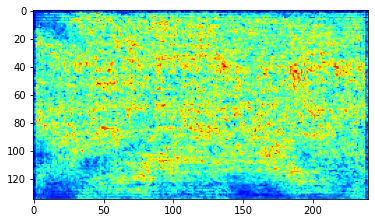

Original Count :  233


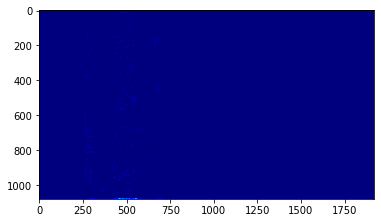

Original Image


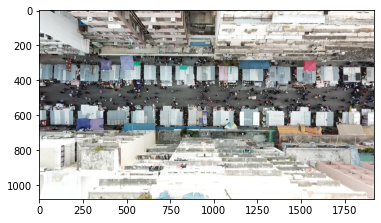

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('/content/CSRNet-pytorch/test/sequences/0010700005.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('/content/CSRNet-pytorch/test/sequences/0010700005.jpg'.replace("sequences", "ground_truth").replace('.jpg','.h5'), 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('/content/CSRNet-pytorch/test/sequences/0010700005.jpg'))
plt.show()